In [1]:
%reload_ext autoreload
%autoreload 2

In [38]:
import pandas as pd
import chess
import matplotlib.pyplot as plt
from data_process.vocabulary import PieceMove
import numpy as np

In [39]:
games_df = pd.read_csv("./data/lichess_database/lichess_db_standard_rated_2024-01.csv", delimiter=";", nrows=10000)
games_df

,index,id,date,white_elo,black_elo,result,ply,ply_30s,piece_uci
0,0,w8e3OTbJ,2024.01.01,1863,2159,0-1,78,-1,Pe2e4 Pc7c5 Pf2f4 Nb8c6 Ng1f3 Pe7e6 Pc2c3 Pd7d...
1,2,jgeqUmTV,2024.01.01,1844,1819,1-0,79,-1,Pe2e4 Pe7e5 Ng1f3 Nb8c6 Pd2d4 Pe5d4 Nf3d4 Bf8c...
2,3,9URvfGxW,2024.01.01,1235,1336,0-1,60,-1,Pd2d4 Pd7d5 Pc2c4 Ng8f6 Pe2e3 Pg7g6 Nb1c3 Bf8g...
3,4,bL48sYuB,2024.01.01,1092,1076,1-0,35,-1,Pd2d4 Pd7d5 Pc2c4 Pd5c4 Pe2e3 Pb7b5 Pa2a4 Pa7a...
4,5,yRvMG89s,2024.01.01,1103,1162,1-0,54,-1,Pe2e4 Pe7e5 Qd1h5 Nb8c6 Bf1c4 Pg7g6 Qh5f3 Ng8f...
...,...,...,...,...,...,...,...,...,...
9995,16334,RHZgHxCW,2024.01.01,1946,1906,0-1,74,52,Pe2e4 Pe7e5 Ng1f3 Nb8c6 Pd2d4 Pe5d4 Bf1c4 Ng8f...
9996,16336,ReaXQS4S,2024.01.01,2010,2007,1-0,107,-1,Pd2d4 Pd7d5 Nb1c3 Ng8f6 Bc1g5 Bc8g4 Ph2h3 Bg4h...
9997,16337,DwymRJmT,2024.01.01,1127,1113,0-1,98,-1,Pe2e4 Pe7e5 Ng1f3 Bf8c5 Pc2c3 Ng8f6 Nf3e5 Nf6e...
9998,16338,JoHKGonN,2024.01.01,1131,1118,1-0,81,-1,Pe2e4 Pe7e5 Nb1c3 Pd7d6 Pd2d4 Pe5d4 Qd1d4 Nb8c...


In [40]:
games = games_df.piece_uci.str.split(" ")

In [41]:
openings = []

for game in games:
    for i in range(1, 11):
        openings.append(" ".join(game[:i]))

openings = list(set(openings))

# openings = [opening.split(" ") for opening in openings]

In [53]:
sample_openings = np.random.choice(openings, 200)
sample_openings = list(set(sample_openings))[:100]
sample_openings = [opening.split(" ") for opening in sample_openings]

In [54]:
len(sample_openings)

100

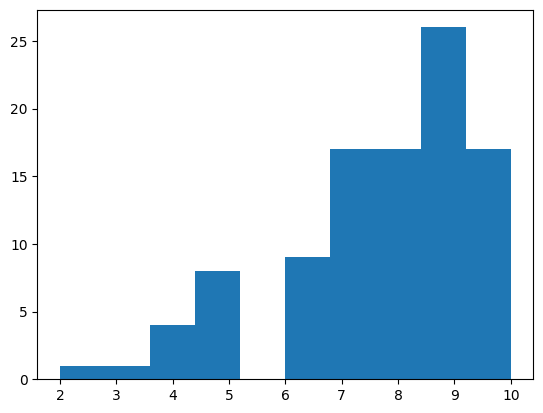

In [55]:
lengths = [len(opening) for opening in sample_openings]

plt.hist(lengths, bins=10)
plt.show()


In [56]:
set(lengths)

{2, 3, 4, 5, 6, 7, 8, 9, 10}

In [58]:
openings_df = pd.DataFrame([{"opening": " ".join(opening)} for opening in sample_openings])
openings_df

,opening
0,Pe2e4 Nb8c6 Ng1f3 Pe7e6 Bf1b5 Pd7d5 Pe4d5 Qd8d...
1,Pe2e4 Pe7e5 Bf1c4 Bf8c5 Qd1f3 Qd8f6 Nb1c3 Ng8e...
2,Pd2d4 Ng8f6 Pc2c4 Pd7d5 Nb1c3
3,Pa2a3 Pe7e5 Ph2h3 Ng8f6 Pd2d4 Pe5d4
4,Pc2c4 Pe7e6 Pd2d4 Ng8f6
...,...
95,Pb2b3 Pd7d5 Pf2f4 Pc7c5 Ng1f3 Pe7e6 Bc1b2 Ng8f6
96,Pe2e4 Pe7e6 Pd2d3 Pd7d5 Pf2f3 Pd5d4 Ng1e2 Pe6e...
97,Pd2d4 Pd7d5 Pc2c4 Bc8f5 Nb1c3 Ng8f6 Ng1f3 Pd5c...
98,Pe2e4 Pe7e5 Ng1f3 Ng8f6 Nf3e5 Nf6e4 Qd1e2 Pd7d...


In [59]:
openings_df.to_csv("./data/openings.csv", index=False)

['Pe2e4', 'Nb8c6', 'Ng1f3', 'Pe7e6', 'Bf1b5', 'Pd7d5', 'Pe4d5', 'Qd8d5', 'Nb1c3', 'Bc8d7']


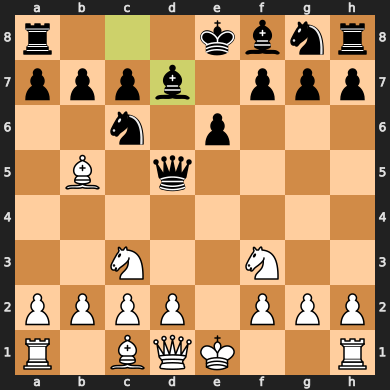

['Pe2e4', 'Pe7e5', 'Bf1c4', 'Bf8c5', 'Qd1f3', 'Qd8f6', 'Nb1c3', 'Ng8e7', 'Pd2d3']


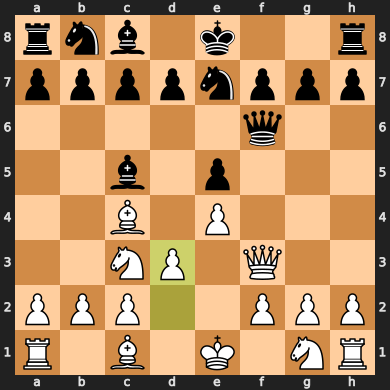

['Pd2d4', 'Ng8f6', 'Pc2c4', 'Pd7d5', 'Nb1c3']


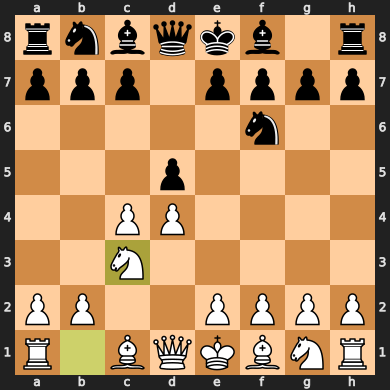

['Pa2a3', 'Pe7e5', 'Ph2h3', 'Ng8f6', 'Pd2d4', 'Pe5d4']


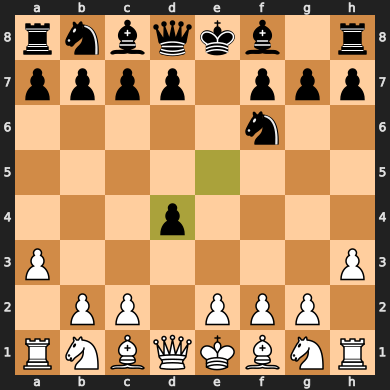

['Pc2c4', 'Pe7e6', 'Pd2d4', 'Ng8f6']


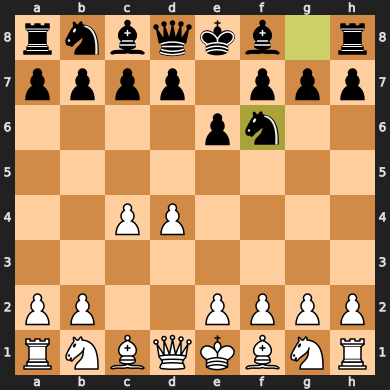

['Pe2e4', 'Pe7e6', 'Pe4e5', 'Pd7d6', 'Ng1f3', 'Pd6e5', 'Nf3e5', 'Nb8d7', 'Ne5d7']


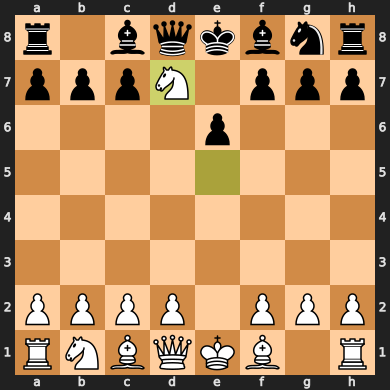

['Pc2c4', 'Pd7d5', 'Nb1c3', 'Pd5d4', 'Pe2e3', 'Pd4c3', 'Qd1a4']


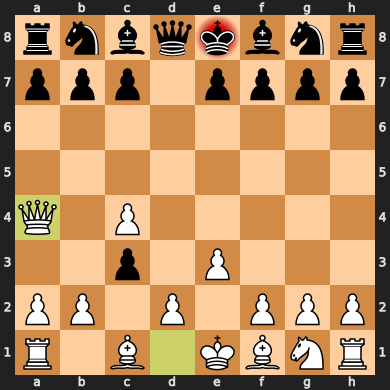

['Pd2d4', 'Pd7d6', 'Pe2e4', 'Pe7e5', 'Pc2c3']


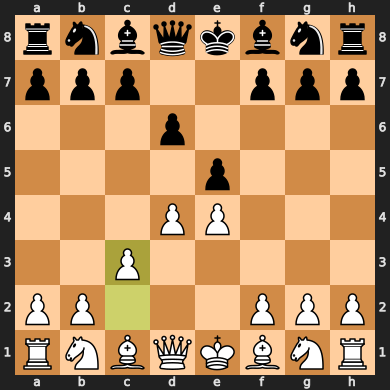

['Pd2d4', 'Pd7d5', 'Nb1c3', 'Pc7c6', 'Bc1f4', 'Pe7e6', 'Pe2e4', 'Bf8b4', 'Qd1d3', 'Ng8e7']


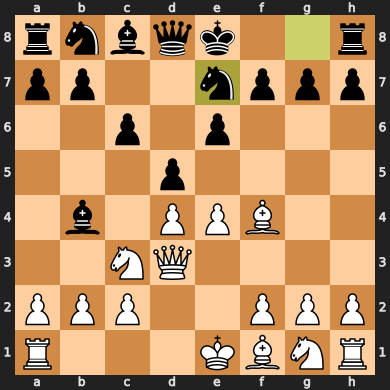

['Pe2e4', 'Pc7c5', 'Ng1f3', 'Pe7e6', 'Pd2d4', 'Pc5d4']


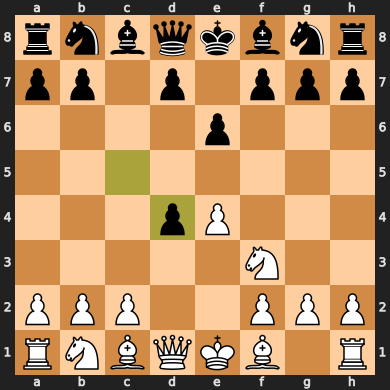

['Pd2d4', 'Ng8f6', 'Bc1g5', 'Pe7e6', 'Pe2e4', 'Ph7h6', 'Bg5h4']


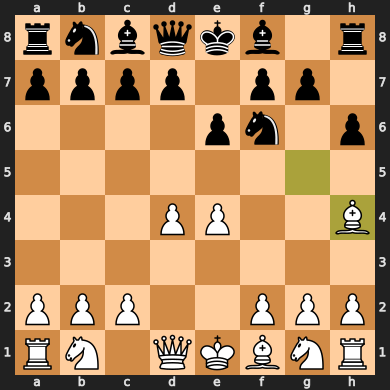

['Pd2d3', 'Pe7e5', 'Pb2b3', 'Nb8c6', 'Pc2c3', 'Ng8f6', 'Bc1b2', 'Pd7d6', 'Qd1c2']


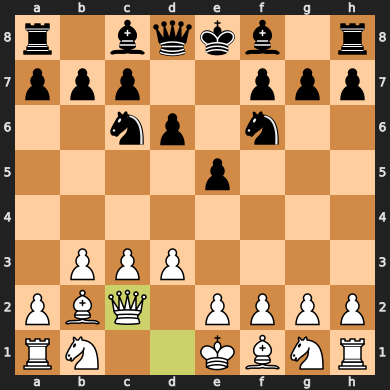

['Pg2g3', 'Pg7g6', 'Bf1g2', 'Bf8g7', 'Pd2d3', 'Ng8f6', 'Ng1f3']


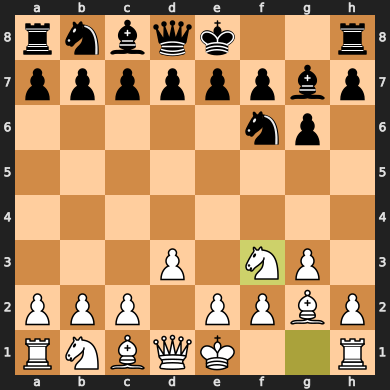

['Pe2e4', 'Pd7d5', 'Pe4e5', 'Pc7c5', 'Pd2d4', 'Nb8c6', 'Ng1f3']


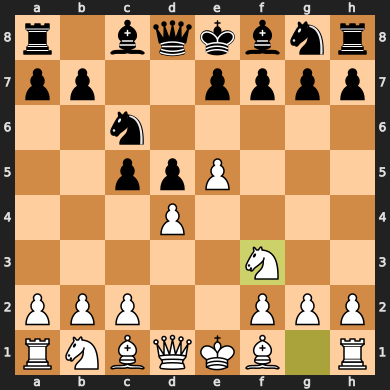

['Ng1f3', 'Ph7h6', 'Pc2c3', 'Pd7d5', 'Pe2e3']


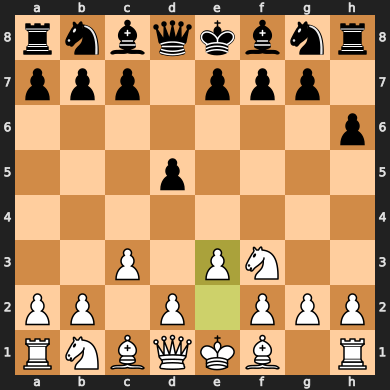

['Pe2e4', 'Pe7e5', 'Ng1f3', 'Nb8c6', 'Bf1c4', 'Ph7h6', 'Pd2d4', 'Bf8d6', 'Pd4d5']


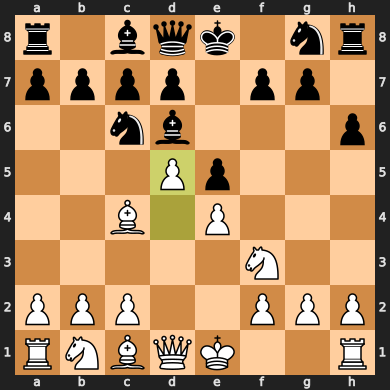

['Pe2e4', 'Pe7e5', 'Ng1f3', 'Nb8c6', 'Nb1c3', 'Bf8c5', 'Bf1b5', 'Pd7d6', 'Ph2h3']


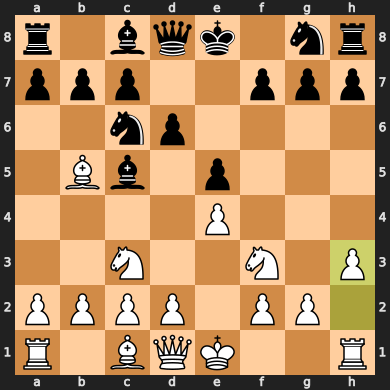

['Pd2d4', 'Pd7d6', 'Bc1f4', 'Pe7e6', 'Ng1f3', 'Ph7h6', 'Pe2e3', 'Pg7g5']


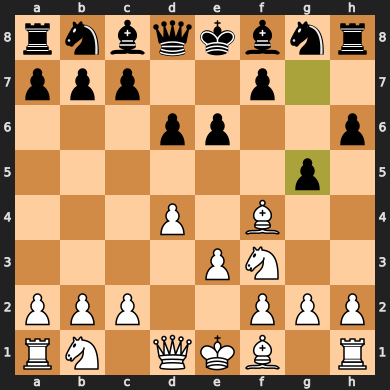

['Pe2e4', 'Pc7c5', 'Pf2f4', 'Nb8c6', 'Ng1f3', 'Pd7d5', 'Pe4d5', 'Qd8d5', 'Nb1c3', 'Qd5h5']


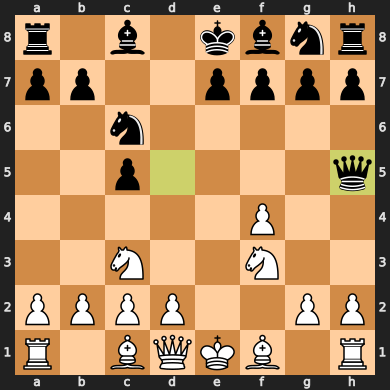

['Pg2g4', 'Pb7b6', 'Bf1g2', 'Pc7c6', 'Pc2c4', 'Bc8b7', 'Nb1c3', 'Pd7d6', 'Qd1b3', 'Qd8c7']


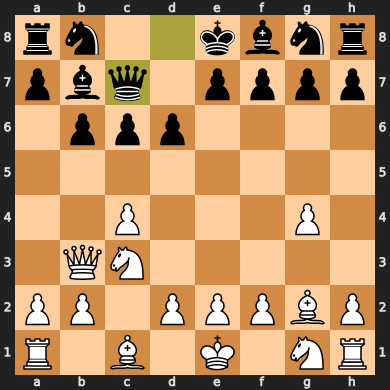

['Pe2e4', 'Pe7e5', 'Ng1f3', 'Nb8c6', 'Bf1c4', 'Bf8c5', 'Ke1g1', 'Ph7h6']


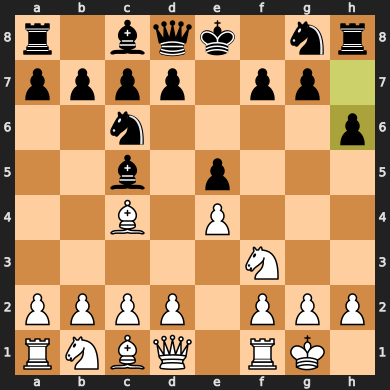

['Pe2e4', 'Pd7d5', 'Qd1f3', 'Ng8f6', 'Ng1h3', 'Pd5e4']


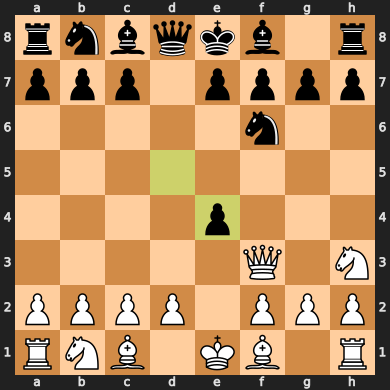

['Pe2e4', 'Pe7e5', 'Ng1f3', 'Nb8c6', 'Bf1c4', 'Ng8f6', 'Nb1c3', 'Bf8c5', 'Pa2a3', 'Pd7d6']


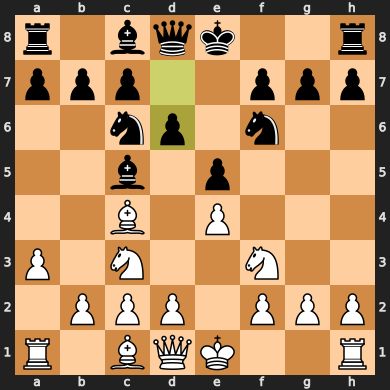

['Pd2d4', 'Pd7d5', 'Pc2c4', 'Ng8f6', 'Nb1c3', 'Pc7c5', 'Bc1g5', 'Pc5d4', 'Pc4d5', 'Pd4c3']


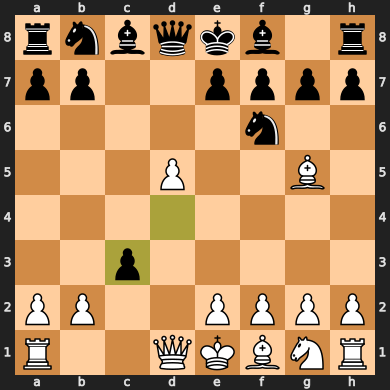

['Pe2e4', 'Pe7e5', 'Ng1f3', 'Nb8c6', 'Nb1c3', 'Ng8f6', 'Pd2d4', 'Bf8b4', 'Pd4d5', 'Bb4c3']


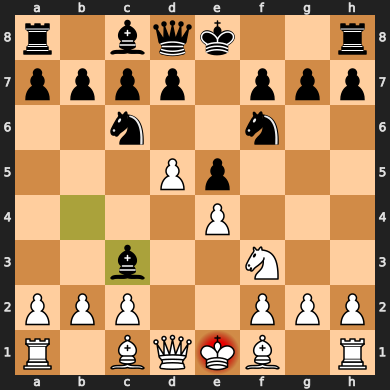

['Pe2e4', 'Pa7a5', 'Ng1f3', 'Pc7c6', 'Nb1c3', 'Ph7h6', 'Pd2d4']


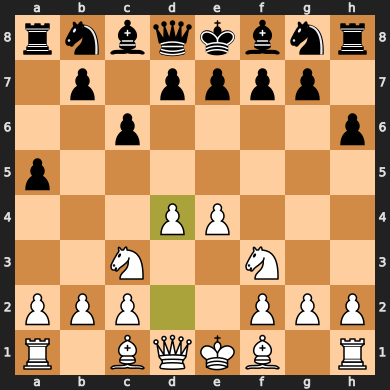

['Pd2d4', 'Pd7d5', 'Pc2c4', 'Pe7e6', 'Ng1f3', 'Ng8f6', 'Pg2g3', 'Bf8e7', 'Bf1g2', 'Ke8g8']


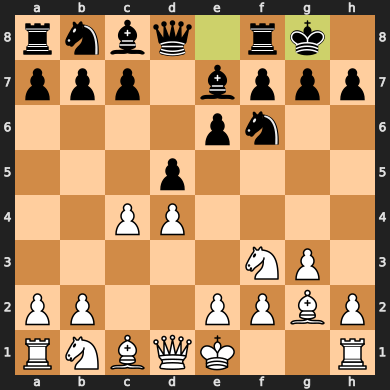

['Pc2c4', 'Pe7e5', 'Nb1c3', 'Ng8f6', 'Pg2g3', 'Pc7c6', 'Bf1g2', 'Bf8c5', 'Ng1f3']


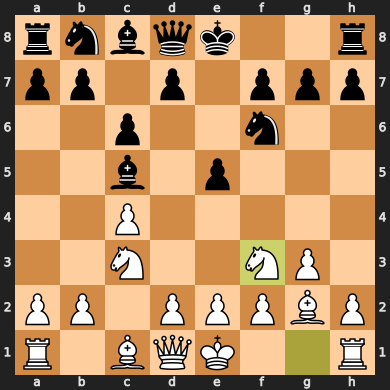

['Pe2e4', 'Pd7d5', 'Qd1f3', 'Pe7e5', 'Pe4d5', 'Ng8f6', 'Pd2d4', 'Pe5e4', 'Qf3f4']


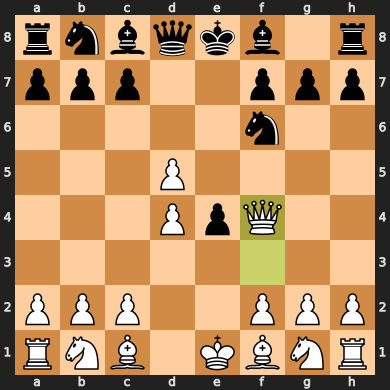

['Pe2e4', 'Pe7e5', 'Pf2f4', 'Pe5f4', 'Ng1f3', 'Bf8c5', 'Nb1c3', 'Pc7c6']


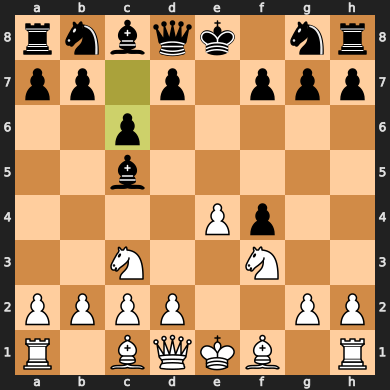

['Pe2e4', 'Pd7d6', 'Pd2d4', 'Ph7h6', 'Pg2g3', 'Ng8f6', 'Bf1g2']


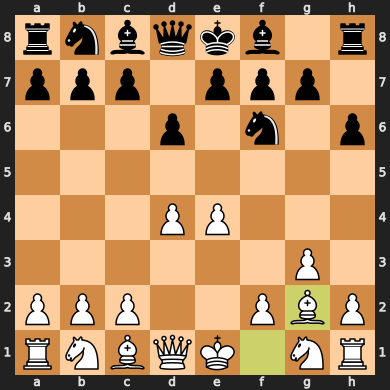

['Pg2g3', 'Pd7d5', 'Bf1g2', 'Pe7e6', 'Ng1f3', 'Ng8f6', 'Ke1g1']


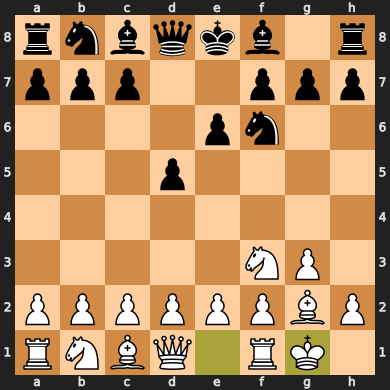

['Pe2e4', 'Pg7g6', 'Pd2d4', 'Bf8g7', 'Ng1f3', 'Pd7d6', 'Nb1c3']


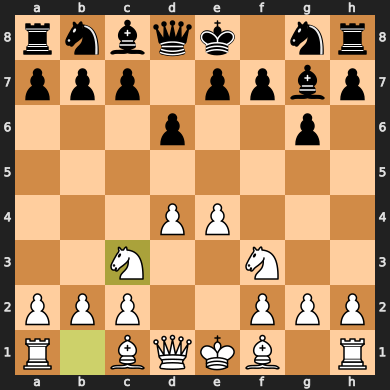

['Pd2d4', 'Pd7d5', 'Pc2c4', 'Pc7c6', 'Pc4c5', 'Ng8f6', 'Pa2a4', 'Bc8g4']


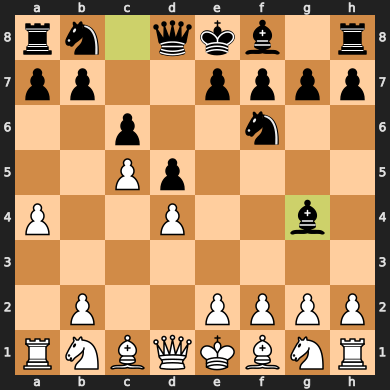

['Pe2e4', 'Pc7c5', 'Ng1f3', 'Pe7e6', 'Pe4e5', 'Pd7d5', 'Pe5d6', 'Ng8f6', 'Bf1b5']


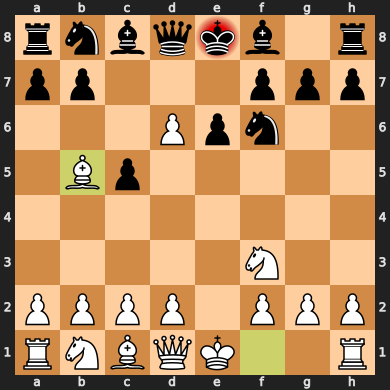

['Pe2e4', 'Pe7e5', 'Ng1f3', 'Pg7g6', 'Bf1c4', 'Bf8g7', 'Pd2d3', 'Pd7d5']


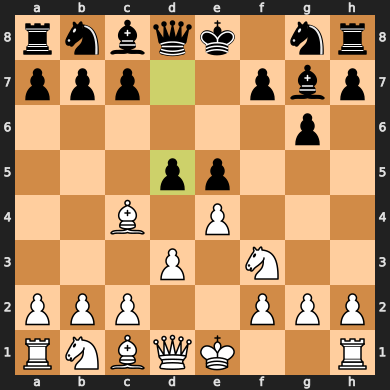

['Pe2e4', 'Pe7e5', 'Ng1f3', 'Nb8c6', 'Nb1c3', 'Pd7d6']


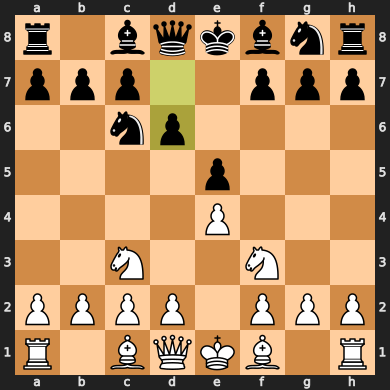

['Pd2d4', 'Pd7d5', 'Bc1f4', 'Pc7c6', 'Pe2e3']


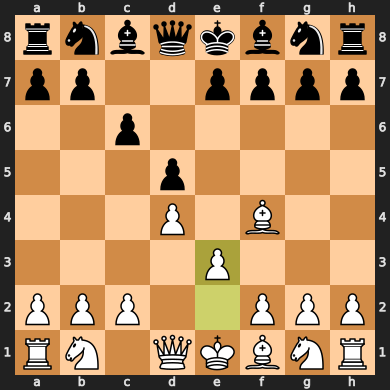

['Pd2d3', 'Ph7h5', 'Pe2e3', 'Pd7d6', 'Nb1d2', 'Ph5h4', 'Ng1e2', 'Pg7g6']


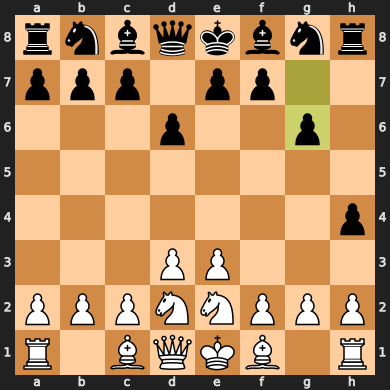

['Pe2e4', 'Pg7g6', 'Bf1c4', 'Bf8g7', 'Nb1c3', 'Pd7d6', 'Pd2d4', 'Ng8f6']


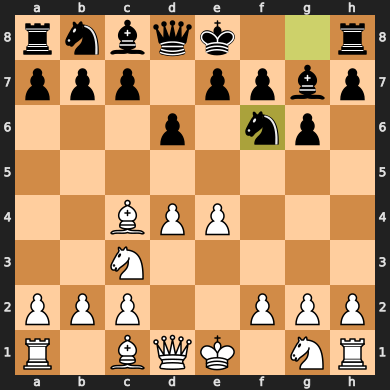

['Pe2e4', 'Pe7e5', 'Ng1f3', 'Ng8f6', 'Nb1c3', 'Nb8c6', 'Bf1c4', 'Pd7d6', 'Nf3g5', 'Qd8e7']


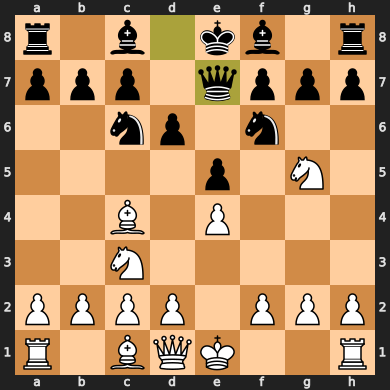

['Pe2e4', 'Pc7c6', 'Pd2d4', 'Pd7d5', 'Pe4e5', 'Pe7e6', 'Pc2c3', 'Bf8e7', 'Bf1d3']


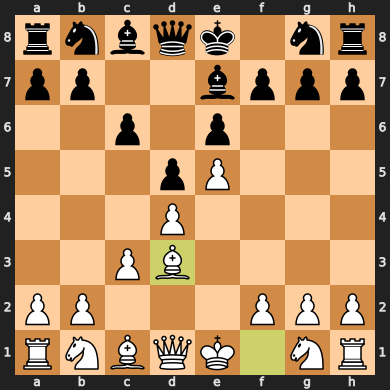

['Pe2e4', 'Ng8f6', 'Pd2d3', 'Pe7e6', 'Pe4e5', 'Nf6d5', 'Pd3d4']


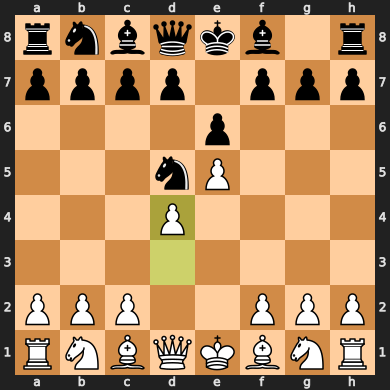

['Pe2e4', 'Pb7b6', 'Qd1f3']


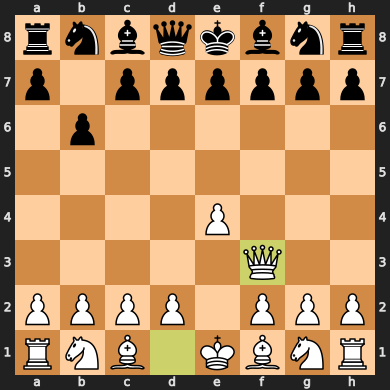

['Pd2d4', 'Pd7d5', 'Ng1f3', 'Pc7c5', 'Pe2e3', 'Pc5d4', 'Nf3d4', 'Pe7e6', 'Pc2c4', 'Pd5c4']


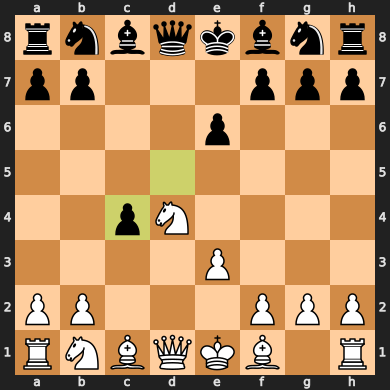

['Pf2f4', 'Pd7d5', 'Ng1f3', 'Ng8f6', 'Pe2e3', 'Pe7e6']


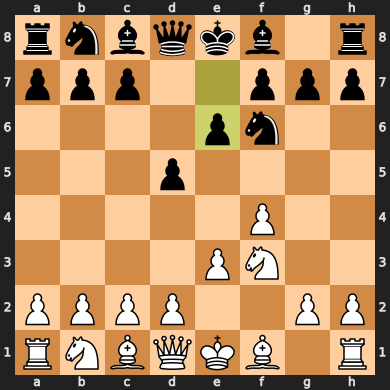

['Pe2e4', 'Pg7g6', 'Ng1f3', 'Pb7b6', 'Ph2h4']


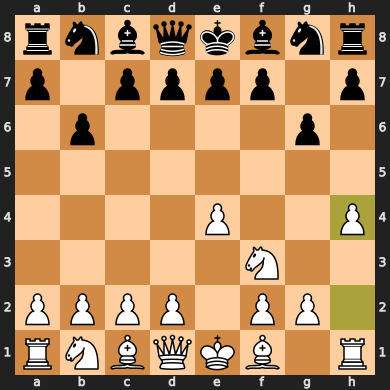

['Pd2d4', 'Pd7d5', 'Nb1c3', 'Pe7e6', 'Pe2e4', 'Pc7c6', 'Pf2f3', 'Pf7f5', 'Pe4e5', 'Bf8b4']


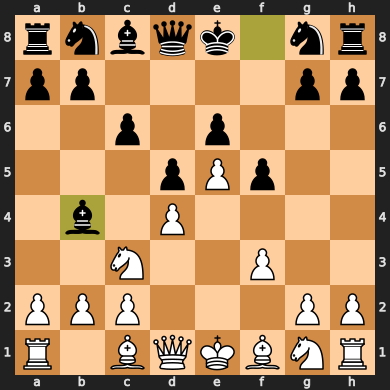

['Pe2e4', 'Pc7c5', 'Ng1f3', 'Pe7e6', 'Pg2g3', 'Pd7d5', 'Pe4d5', 'Pe6d5', 'Bf1g2', 'Ng8f6']


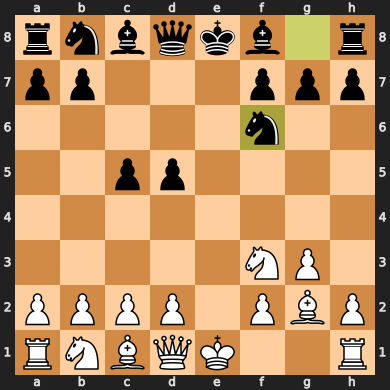

['Pd2d4', 'Pd7d5', 'Pe2e3', 'Pe7e6', 'Bf1d3', 'Pc7c5', 'Pc2c3', 'Pc5d4', 'Pe3d4', 'Bf8d6']


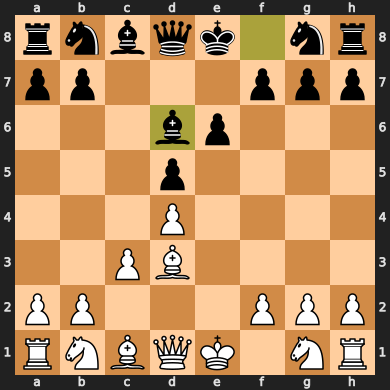

['Pe2e4', 'Pe7e5', 'Ng1f3', 'Ng8f6', 'Pd2d4', 'Pe5d4', 'Pe4e5', 'Qd8e7', 'Bf1c4']


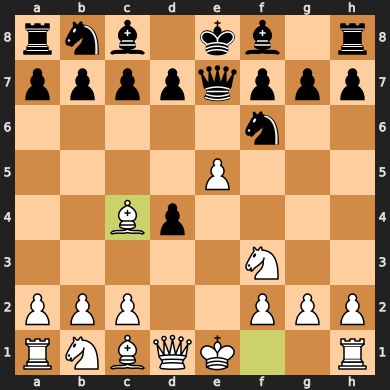

['Pe2e4', 'Pc7c6', 'Pd2d4', 'Pd7d5', 'Pe4d5', 'Pc6d5', 'Pc2c4', 'Ng8f6', 'Ng1f3', 'Pe7e6']


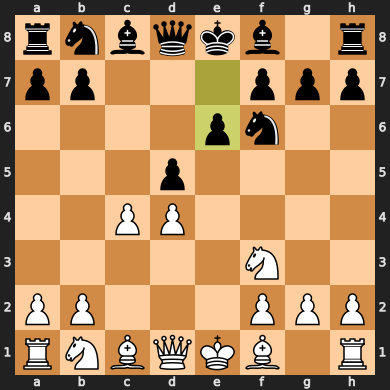

['Pe2e4', 'Pc7c5', 'Qd1f3', 'Nb8c6', 'Pc2c3', 'Pd7d6', 'Bf1c4', 'Ng8f6']


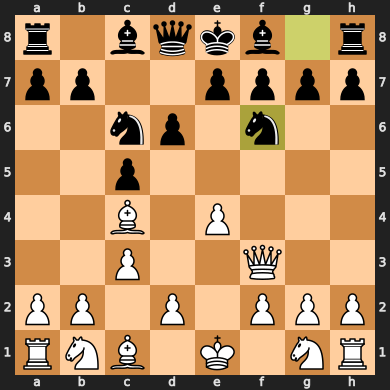

['Pd2d4', 'Pe7e6', 'Pc2c4', 'Qd8f6', 'Ng1f3', 'Bf8b4', 'Bc1d2', 'Bb4d6', 'Pe2e4']


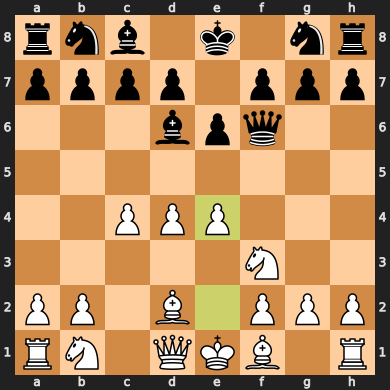

['Pe2e4', 'Pb7b6', 'Pf2f4', 'Bc8b7', 'Nb1c3', 'Pe7e6', 'Ng1f3']


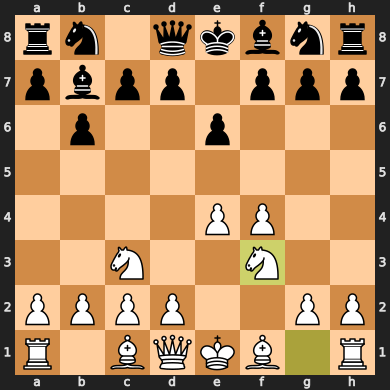

['Pd2d4', 'Ng8f6', 'Pf2f3', 'Pd7d6', 'Pe2e3', 'Ph7h6', 'Pc2c3', 'Bc8f5']


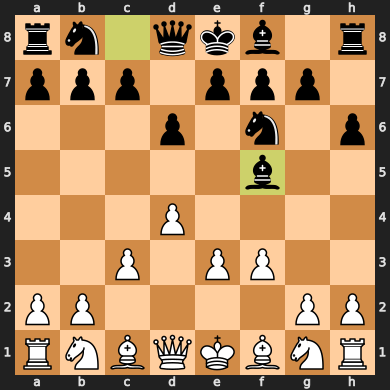

['Pb2b3', 'Pd7d6', 'Bc1b2', 'Nb8d7', 'Nb1a3']


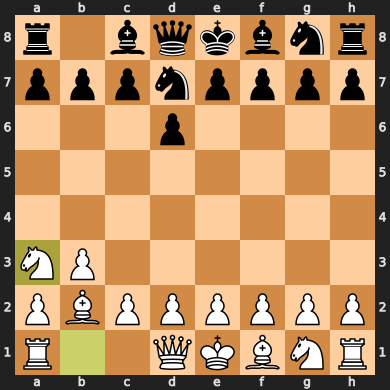

['Pd2d3', 'Pe7e5', 'Pa2a3', 'Ng8f6', 'Ng1f3', 'Pd7d6']


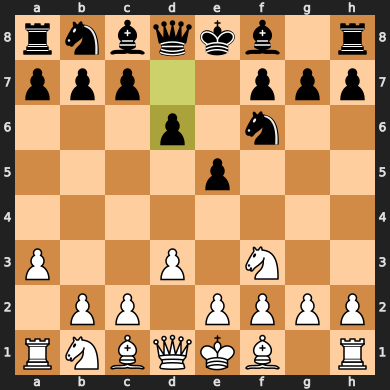

['Pd2d4', 'Pe7e5', 'Nb1c3', 'Pd7d6', 'Pe2e4', 'Ng8f6', 'Pd4e5', 'Pd6e5']


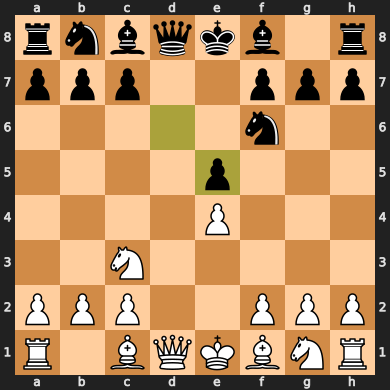

['Pe2e4', 'Ng8f6', 'Nb1c3', 'Pd7d5', 'Pe4e5', 'Nf6e4', 'Nc3e4', 'Pd5e4', 'Qd1e2']


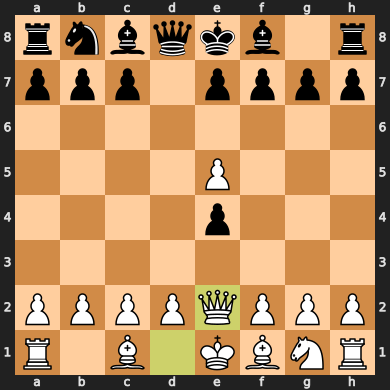

['Pe2e4', 'Pc7c5', 'Nb1c3', 'Pg7g6', 'Ng1f3', 'Bf8g7', 'Pd2d3', 'Nb8c6', 'Bc1e3']


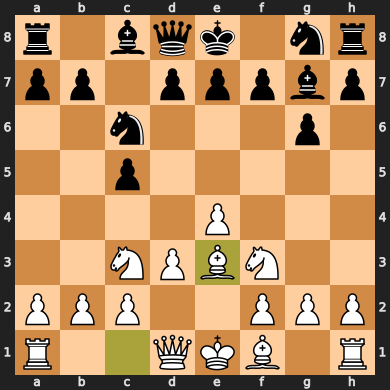

['Pe2e4', 'Pe7e5', 'Ng1f3', 'Bf8c5', 'Nb1c3', 'Ng8f6', 'Pd2d3']


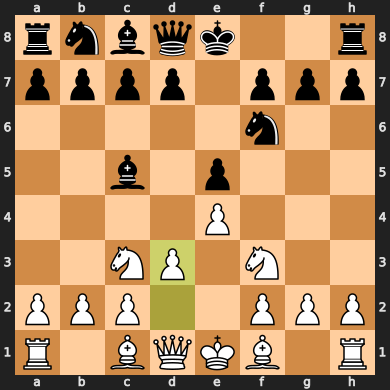

['Pb2b4', 'Pe7e6', 'Bc1b2', 'Pf7f6', 'Pa2a3', 'Pb7b6', 'Pc2c4']


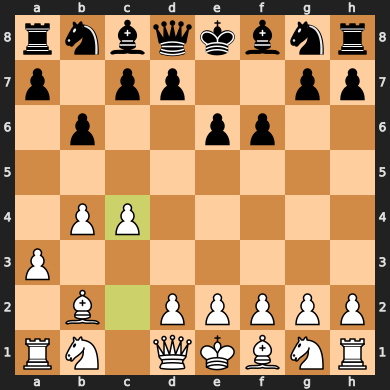

['Pc2c4', 'Pe7e6', 'Nb1c3', 'Pf7f5']


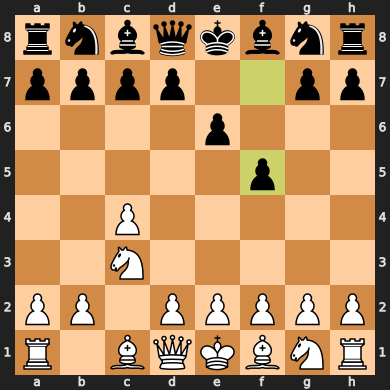

['Pd2d4', 'Pd7d5', 'Pc2c4', 'Pe7e6', 'Nb1c3', 'Bf8b4', 'Ng1f3', 'Pd5c4']


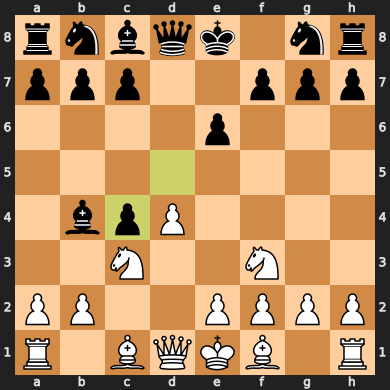

['Pe2e4', 'Pe7e5', 'Bf1c4', 'Ph7h6', 'Ng1f3', 'Ng8f6', 'Nb1c3', 'Nb8c6', 'Ph2h3']


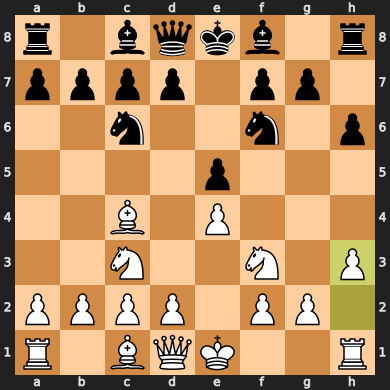

['Pe2e3', 'Pe7e5', 'Pc2c4', 'Ng8f6', 'Nb1c3', 'Bf8c5', 'Pa2a3', 'Pb7b6', 'Pb2b4']


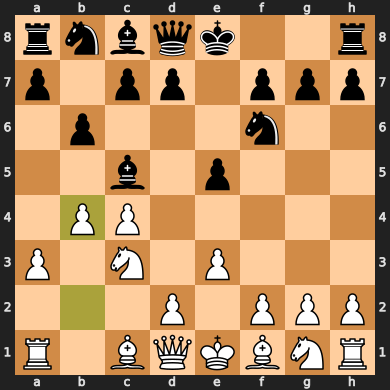

['Pe2e4', 'Pe7e5', 'Ng1f3', 'Pd7d6', 'Nb1c3', 'Pf7f5', 'Pe4f5']


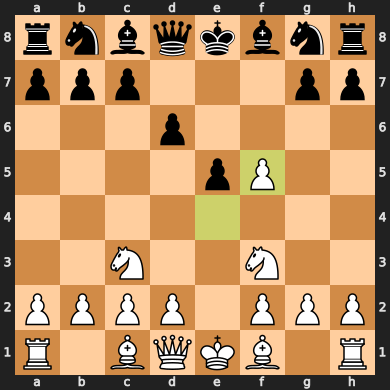

['Pe2e4', 'Pe7e6', 'Pd2d3', 'Pd7d5', 'Nb1d2', 'Pc7c5', 'Pf2f4', 'Nb8c6', 'Ng1f3']


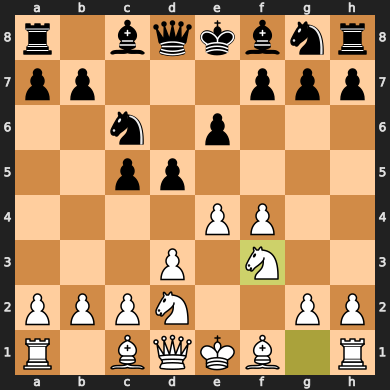

['Pe2e4', 'Pd7d6', 'Ng1f3', 'Pg7g6', 'Nb1c3', 'Bf8g7', 'Pd2d4', 'Ng8f6', 'Bf1c4', 'Ke8g8']


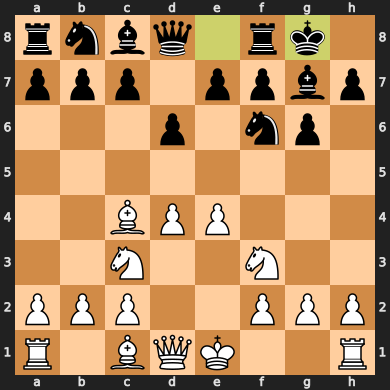

['Pf2f4', 'Pd7d6']


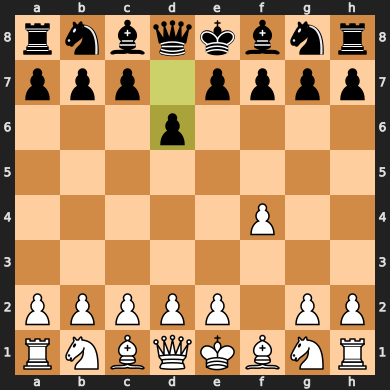

['Pd2d3', 'Pd7d5', 'Ng1f3', 'Pe7e6', 'Pe2e4', 'Pc7c6']


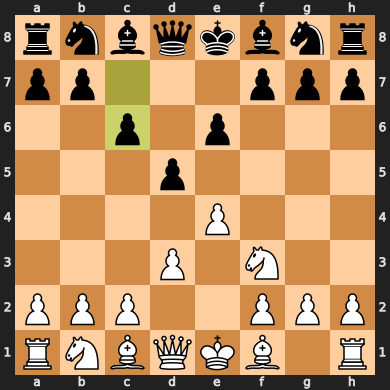

['Pe2e4', 'Pe7e5', 'Pd2d3', 'Ph7h6', 'Nb1c3', 'Pa7a6']


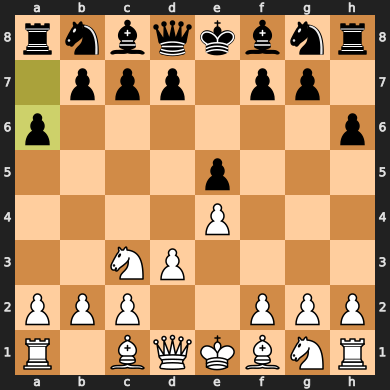

['Pe2e4', 'Pd7d6', 'Pf2f4', 'Pe7e5']


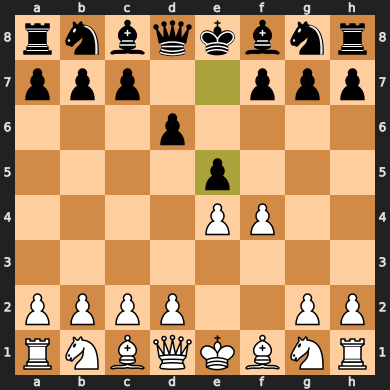

['Pe2e4', 'Pe7e6', 'Ng1f3', 'Pd7d5', 'Pe4d5', 'Pe6d5', 'Pd2d3']


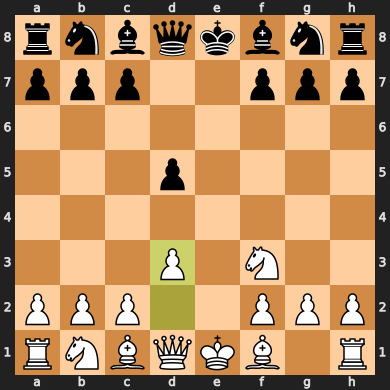

['Pe2e4', 'Pd7d5', 'Pe4d5', 'Qd8d5', 'Nb1c3', 'Qd5a5', 'Pd2d3', 'Pc7c6', 'Bc1d2']


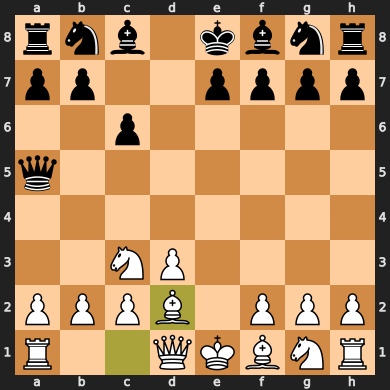

['Pd2d4', 'Pg7g6', 'Pf2f4', 'Bf8g7', 'Ng1f3', 'Pe7e6', 'Pe2e3', 'Ng8e7', 'Bf1d3']


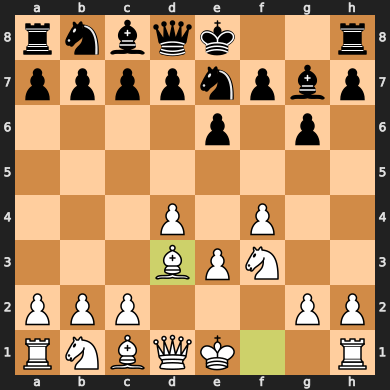

['Pe2e4', 'Pg7g6', 'Nb1c3', 'Bf8g7', 'Ng1f3', 'Pf7f6', 'Pd2d4']


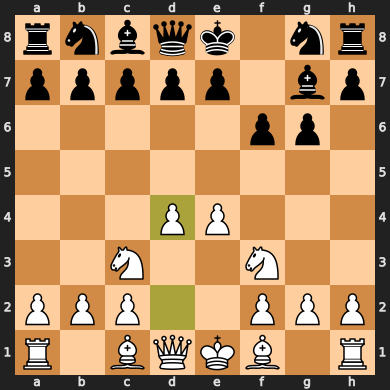

['Pe2e4', 'Pe7e5', 'Ng1f3', 'Nb8c6', 'Bf1c4', 'Ph7h6', 'Pc2c3', 'Ng8f6']


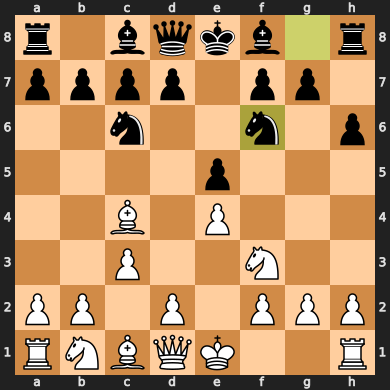

['Pe2e4', 'Pe7e5', 'Ng1f3', 'Pd7d6', 'Bf1c4', 'Bc8g4', 'Bc4f7']


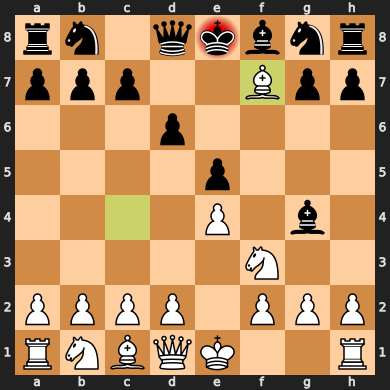

['Pd2d4', 'Pd7d5', 'Ng1f3', 'Ng8f6', 'Pe2e3', 'Bc8f5', 'Pb2b3']


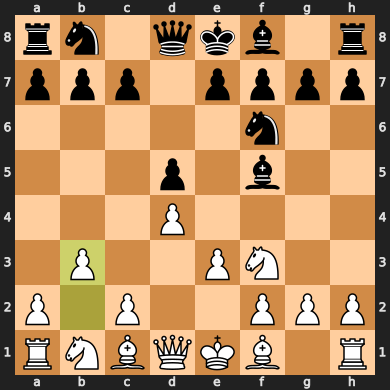

['Pc2c4', 'Pe7e5', 'Pg2g3', 'Pf7f5', 'Bf1g2']


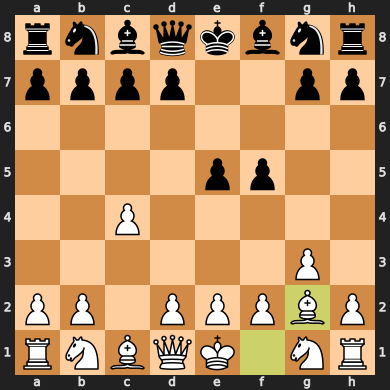

['Pd2d4', 'Pd7d5', 'Ng1f3', 'Pe7e6', 'Pe2e3', 'Nb8c6', 'Pc2c4', 'Pd5c4']


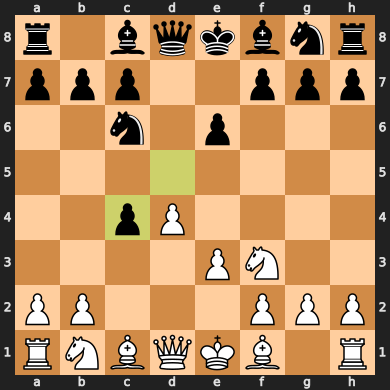

['Ng1f3', 'Pd7d5', 'Nb1c3', 'Nb8c6', 'Pe2e4', 'Pd5d4', 'Nc3e2', 'Bc8g4']


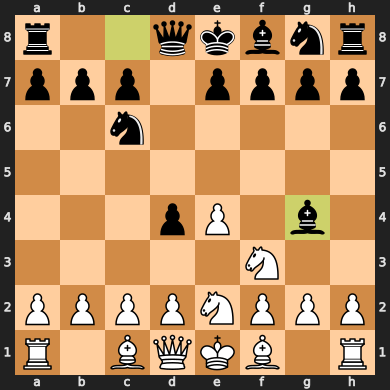

['Pd2d4', 'Pe7e6', 'Pe2e4', 'Pd7d5', 'Pe4e5', 'Pc7c5', 'Pc2c3', 'Qd8b6']


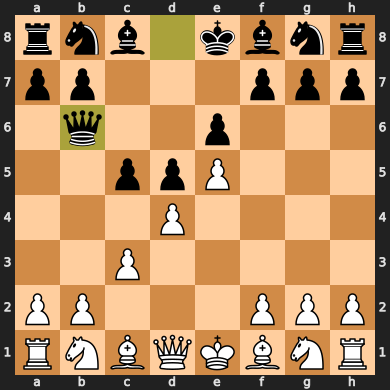

['Pd2d4', 'Pe7e5', 'Pd4d5', 'Pd7d6', 'Pe2e4', 'Ng8f6', 'Bc1g5', 'Bf8e7', 'Bg5f6']


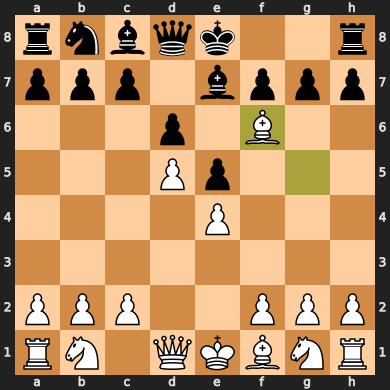

['Pd2d4', 'Pd7d5', 'Pc2c4', 'Pd5c4', 'Pe2e3', 'Bc8e6', 'Nb1c3', 'Pb7b5', 'Pa2a4']


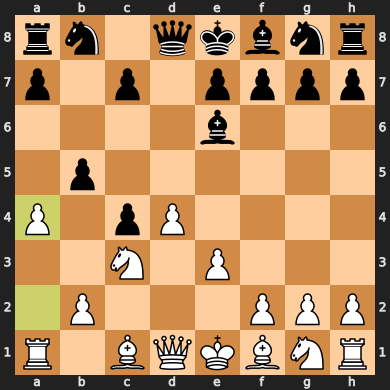

['Pd2d4', 'Pd7d5', 'Pc2c4', 'Ng8f6', 'Pc4c5', 'Bc8f5', 'Pa2a3', 'Pc7c6', 'Pb2b4']


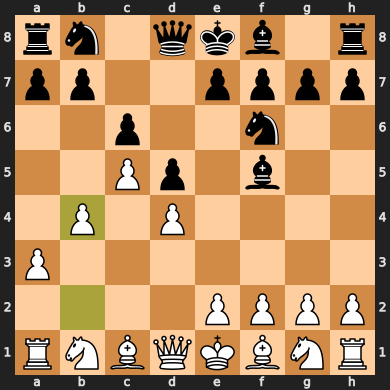

['Pe2e4', 'Pe7e5', 'Ng1f3', 'Qd8e7', 'Bf1c4', 'Pg7g5']


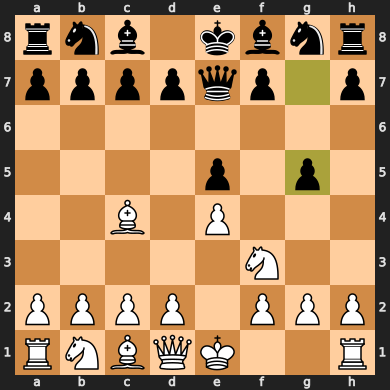

['Pe2e4', 'Pb7b6', 'Pd2d4', 'Bc8b7', 'Pf2f3', 'Pe7e6', 'Bc1e3', 'Pc7c5', 'Ng1e2']


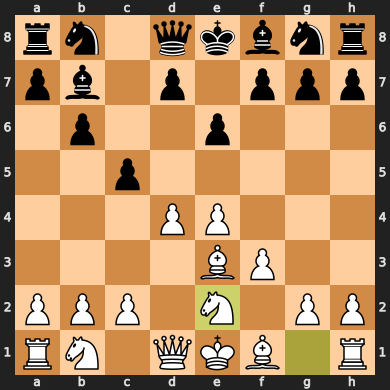

['Pc2c4', 'Pc7c6', 'Pd2d4', 'Pd7d5', 'Pe2e3', 'Bc8f5', 'Pc4c5', 'Pe7e6', 'Bf1d3']


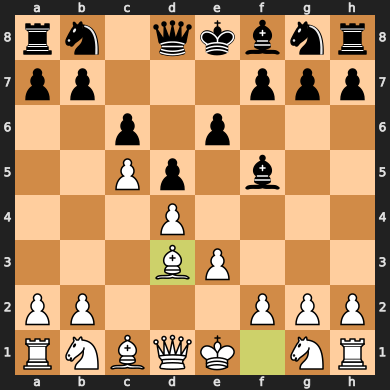

['Pe2e4', 'Pd7d5', 'Pe4d5', 'Ng8f6', 'Pc2c4', 'Bc8g4', 'Bf1e2', 'Bg4f5', 'Qd1b3']


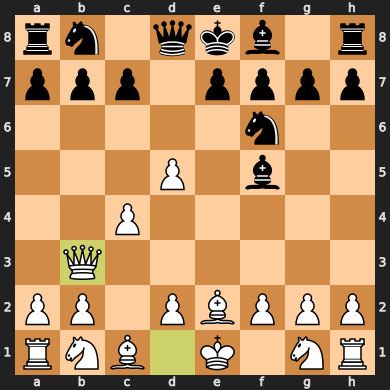

['Pd2d4', 'Pe7e6', 'Pe2e4', 'Pd7d5', 'Bf1b5']


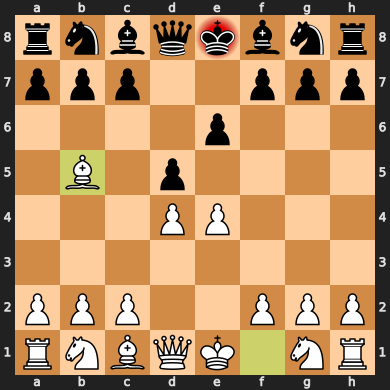

['Pe2e4', 'Nb8c6', 'Pf2f4', 'Pd7d5']


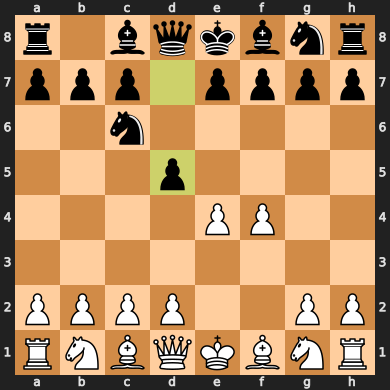

['Pg2g3', 'Nb8c6', 'Bf1g2', 'Pe7e5', 'Pc2c3', 'Bf8c5', 'Pd2d3', 'Pd7d6', 'Qd1b3']


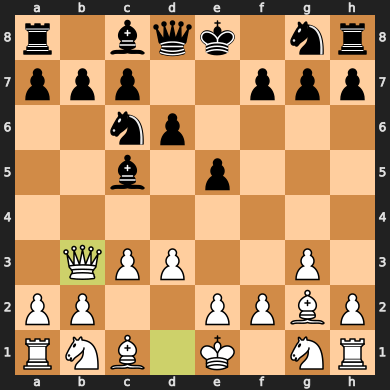

['Pb2b3', 'Pd7d5', 'Pf2f4', 'Pc7c5', 'Ng1f3', 'Pe7e6', 'Bc1b2', 'Ng8f6']


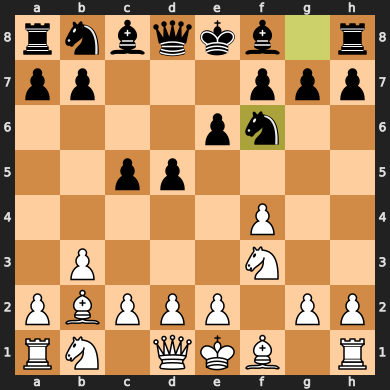

['Pe2e4', 'Pe7e6', 'Pd2d3', 'Pd7d5', 'Pf2f3', 'Pd5d4', 'Ng1e2', 'Pe6e5', 'Ne2g3']


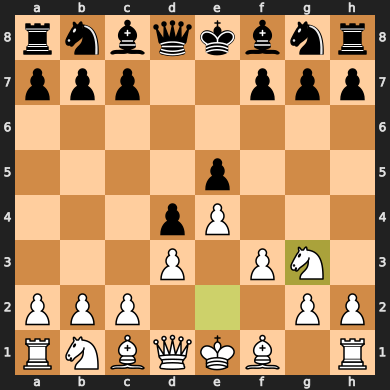

['Pd2d4', 'Pd7d5', 'Pc2c4', 'Bc8f5', 'Nb1c3', 'Ng8f6', 'Ng1f3', 'Pd5c4', 'Pe2e3', 'Bf5e6']


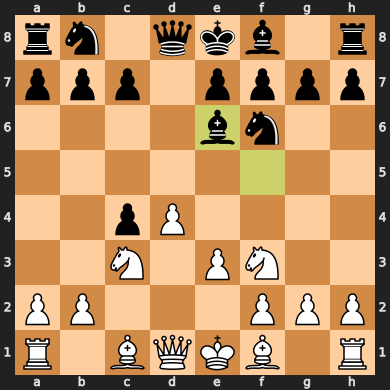

['Pe2e4', 'Pe7e5', 'Ng1f3', 'Ng8f6', 'Nf3e5', 'Nf6e4', 'Qd1e2', 'Pd7d5', 'Pf2f3', 'Qd8e7']


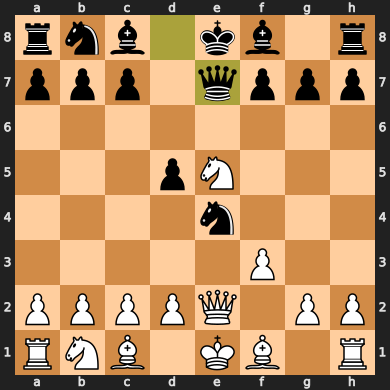

['Pc2c4', 'Pe7e5', 'Pe2e4', 'Ng8f6', 'Ng1f3', 'Nb8c6', 'Nb1c3', 'Bf8b4']


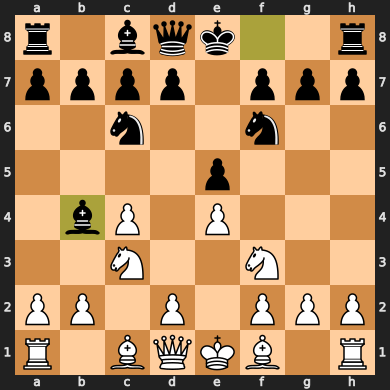

In [57]:
for opening in sample_openings:
    print(opening)
    board = chess.Board()

    for move in opening:
        board.push_uci(move[1:])

    display(board)